In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

df = pd.read_excel("./data_files/cnooc/PTA price.xlsx")

In [3]:
df

,capacity,import,export,storage,demand,PTA_price_tax,PX_price,tax,PTA_price,diff
0,127.47,15.710596,0.620400,28.094951,122.296741,7496.304348,10484.736842,0.17,6407.097733,537.437364
1,180.73,14.632831,1.006904,49.574208,145.624816,7322.800000,10407.619048,0.17,6258.803419,432.315832
2,239.41,15.760656,1.516338,67.549705,207.190186,7417.500000,10574.090909,0.17,6339.743590,420.060218
3,205.26,14.043811,2.550733,60.552163,200.764463,6950.000000,10008.181818,0.17,5940.170940,337.299922
4,95.93,7.603871,1.595376,31.472527,119.001141,6529.411765,9510.000000,0.17,5580.693816,256.719457
...,...,...,...,...,...,...,...,...,...,...
86,410.05,1.847973,13.970251,97.099624,416.228649,3535.652174,4520.000000,0.13,3128.895729,508.895729
87,486.14,1.062365,9.500224,71.713790,519.963693,3786.000000,5080.000000,0.13,3350.442478,405.840708
88,308.63,0.200565,19.659156,53.952346,345.850034,4198.125000,5730.882353,0.13,3715.154867,393.271733
89,400.51,0.377583,33.867440,65.099979,422.852225,4466.521739,6276.086957,0.13,3952.674105,314.765294


In [4]:
import seaborn as sns

In [5]:
features = ['capacity', 'import', 'export', 'storage', 'demand','PX_price']
features.remove("PX_price")
target = "PTA_price"

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
df = df[features + [target]].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)
cols = X_train.columns
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns = cols)

In [9]:
model = DecisionTreeRegressor(max_depth = 3, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

rms_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rms_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("RMSE train: %.2f" % rms_train)
print("RMSE test: %.2f" % rms_test)

RMSE train: 595.06
RMSE test: 1105.76


In [11]:
df

,capacity,import,export,storage,demand,PTA_price
0,127.47,15.710596,0.620400,28.094951,122.296741,6407.097733
1,180.73,14.632831,1.006904,49.574208,145.624816,6258.803419
2,239.41,15.760656,1.516338,67.549705,207.190186,6339.743590
3,205.26,14.043811,2.550733,60.552163,200.764463,5940.170940
4,95.93,7.603871,1.595376,31.472527,119.001141,5580.693816
...,...,...,...,...,...,...
86,410.05,1.847973,13.970251,97.099624,416.228649,3128.895729
87,486.14,1.062365,9.500224,71.713790,519.963693,3350.442478
88,308.63,0.200565,19.659156,53.952346,345.850034,3715.154867
89,400.51,0.377583,33.867440,65.099979,422.852225,3952.674105


<AxesSubplot:>

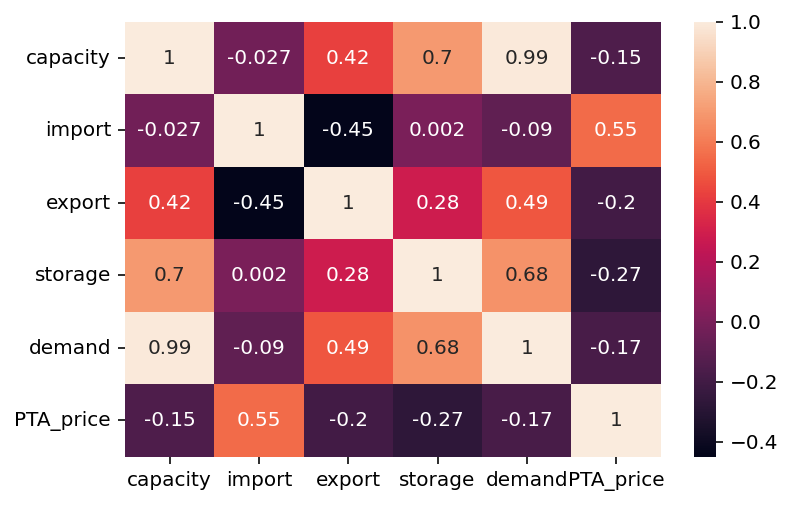

In [12]:
sns.heatmap(df[features+[target]].corr(), annot=True)

In [14]:
# plt.scatter(df['PX_price'], df['PTA_price'])
# plt.grid(linestyle = '--')
# plt.xlabel("PX price")
# plt.ylabel("PTA price")
# plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
linear_regress = LinearRegression()

linear_regress.fit(X_train, y_train)

LinearRegression()

In [16]:
def evaluate(model):
    rms_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    rms_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

    print("RMSE train: %.2f" % rms_train)
    print("RMSE test: %.2f" % rms_test)
    

In [17]:
evaluate(linear_regress)

RMSE train: 800.07
RMSE test: 708.89


In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

evaluate(svr)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=4, min_samples_leaf=5)
rf.fit(X_train, y_train)

evaluate(rf)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
evaluate(lasso)

In [ ]:
linear_ptx = LinearRegression()
linear_ptx.fit(X_train[['PX_price']], y_train)

rms_train = np.sqrt(mean_squared_error(y_train, linear_ptx.predict(X_train[['PX_price']])))
rms_test = np.sqrt(mean_squared_error(y_test, linear_ptx.predict(X_test[['PX_price']])))

print("RMSE train: %.2f" % rms_train)
print("RMSE test: %.2f" % rms_test)